In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import fetch_california_housing

In [5]:
cali = fetch_california_housing()
cali_df = pd.DataFrame(cali['data'], columns=cali['feature_names'])
cali_df['Target'] = cali['target']
cali_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [7]:
data = torch.from_numpy(cali_df.values).float()
data.shape

torch.Size([20640, 9])

In [9]:
X = data[:, :-1]
y = data[:, -1:]
X.shape, y.shape

(torch.Size([20640, 8]), torch.Size([20640, 1]))

In [21]:
n_epochs = 30000
lr = 1e-3
print_interval = 1000

In [22]:
model = nn.Linear(X.shape[-1], y.shape[-1])
optimizer = optim.Adam(model.parameters())

In [23]:
for i in range(n_epochs):
    y_hat = model(X)
    loss = F.mse_loss(y_hat, y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (i + 1) % print_interval == 0:
        print(f'Epoch {i + 1}: loss={loss}')

Epoch 1000: loss=479.0851745605469
Epoch 2000: loss=49.58344650268555
Epoch 3000: loss=4.587164878845215
Epoch 4000: loss=3.2989768981933594
Epoch 5000: loss=2.630812168121338
Epoch 6000: loss=2.034599542617798
Epoch 7000: loss=1.5694587230682373
Epoch 8000: loss=1.2164431810379028
Epoch 9000: loss=0.9784461855888367
Epoch 10000: loss=0.8581169247627258
Epoch 11000: loss=0.8004599809646606
Epoch 12000: loss=0.7513972520828247
Epoch 13000: loss=0.6973519921302795
Epoch 14000: loss=0.6481027603149414
Epoch 15000: loss=0.6169350743293762
Epoch 16000: loss=0.6057109832763672
Epoch 17000: loss=0.603904664516449
Epoch 18000: loss=0.6035379767417908
Epoch 19000: loss=0.6412789821624756
Epoch 20000: loss=0.6030999422073364
Epoch 21000: loss=0.6028949618339539
Epoch 22000: loss=0.6026909947395325
Epoch 23000: loss=0.6024894118309021
Epoch 24000: loss=0.6022889018058777
Epoch 25000: loss=0.6030917763710022
Epoch 26000: loss=0.6231945753097534
Epoch 27000: loss=0.6016896963119507
Epoch 28000: los

In [34]:
result_df = pd.DataFrame(torch.concat([y, y_hat], dim=1).detach_().numpy(), columns=['y', 'y_hat']).clip(lower=0, upper=5)
result_df

,y,y_hat
0,4.526,4.100678
1,3.585,3.887575
2,3.521,3.533281
3,3.413,3.156192
4,3.422,2.159955
...,...,...
20635,0.781,0.696164
20636,0.771,1.057225
20637,0.923,0.611964
20638,0.847,0.736717


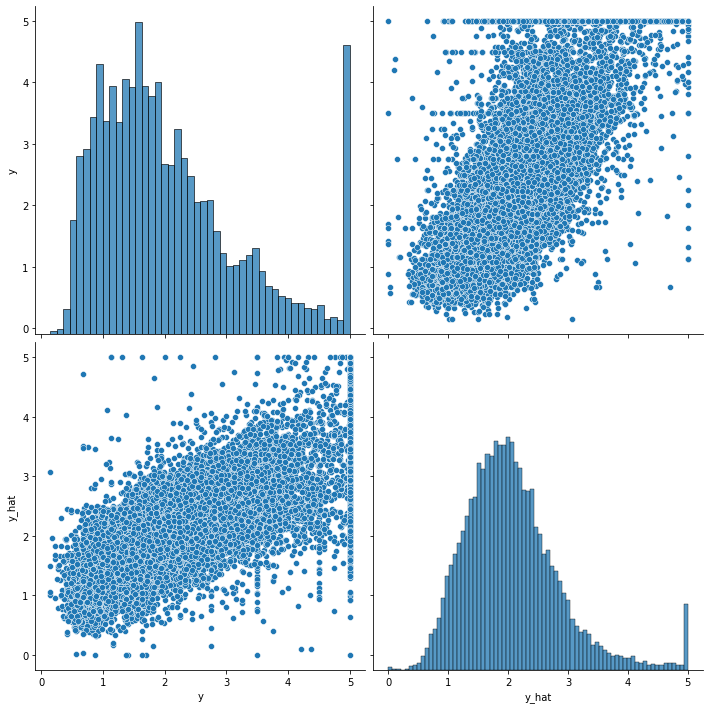

In [35]:
sns.pairplot(result_df, height=5)
plt.show()